Chapter 13 of Handbook Of Quantitative Ecology

- Transition Matrices/Succession

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
def sapling_pop(years, initial_beech, initial_maple, initial_other):

    #Create a matrix to represent the transition of the population between years
    A = np.array([ [0.8,.25,.1], [.1,.15,.25], [.1,.6,.65] ])
    initial_population_vector = np.array([initial_beech, initial_maple, initial_other])
    #Create an array to store the total population each year
    beech_population = []
    maple_population = []
    other_population = []
    #append the current population to the list
    beech_population.append(initial_population_vector[0])
    maple_population.append(initial_population_vector[1])
    other_population.append(initial_population_vector[2])

    n_t = initial_population_vector
    for years in range(years):
        n_t = np.dot(n_t, A)
        beech_population.append(n_t[0])
        maple_population.append(n_t[1])
        other_population.append(n_t[2])

    return beech_population, maple_population, other_population

beech_population, maple_population, other_population = sapling_pop(50, 1, 20, 79)

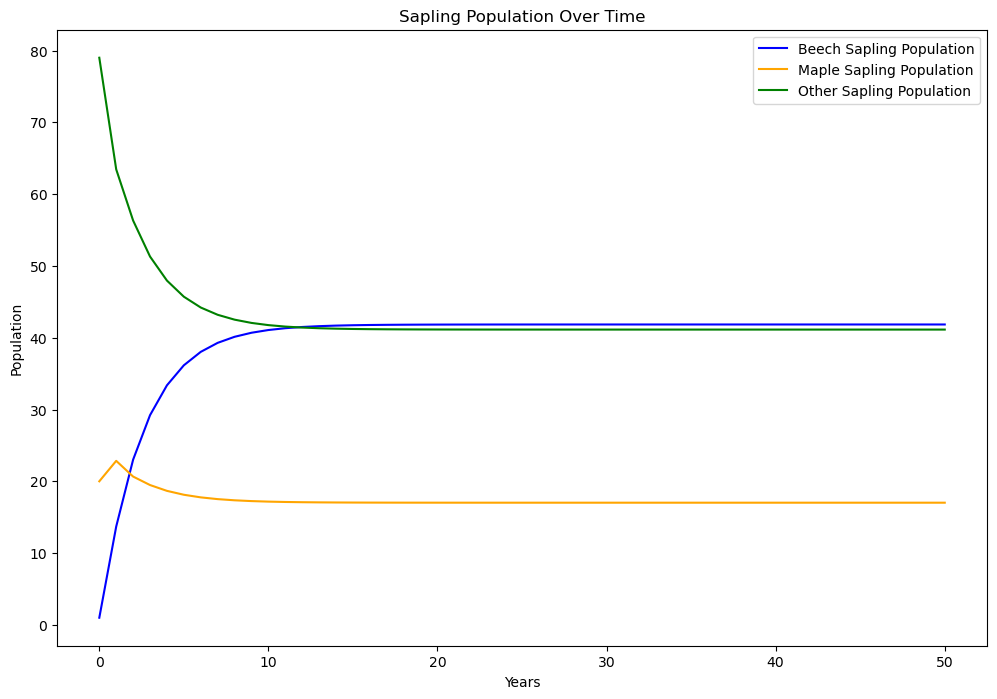

In [26]:
#plot the population of each age group and the total population over time
plt.figure(figsize=(12,8))
plt.plot(beech_population, label='Beech Sapling Population', color='blue')
plt.plot(maple_population, label='Maple Sapling Population', color='orange')
plt.plot(other_population, label='Other Sapling Population', color='green')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Sapling Population Over Time')
plt.legend()
plt.show()

In [38]:

A = np.array([
    [0.8, 0.25, 0.1],
    [0.1, 0.15, 0.25],
    [0.1, 0.6, 0.65]
])

# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Find the eigenvector corresponding to eigenvalue closest to 1
i = np.argmin(np.abs(eigenvalues - 1))
stationary = np.real(eigenvectors[:, i])
stationary = stationary / np.sum(stationary)  # normalize to sum to 1

print("Stationary distribution (Beech, Maple, Other):")
print(stationary)


Stationary distribution (Beech, Maple, Other):
[0.41843972 0.17021277 0.41134752]


In [41]:
def sapling_pop(years, initial_beech, initial_maple, initial_other):

    # Transition matrix
    A = np.array([
        [0.8, 0.25, 0.1],
        [0.1, 0.15, 0.25],
        [0.1, 0.6, 0.65]
    ])
    
    initial_population_vector = np.array([initial_beech, initial_maple, initial_other])

    beech_population = [initial_population_vector[0]]
    maple_population = [initial_population_vector[1]]
    other_population = [initial_population_vector[2]]

    n_t = initial_population_vector
    for _ in range(years):
        n_t = np.dot(A, n_t)
        beech_population.append(n_t[0])
        maple_population.append(n_t[1])
        other_population.append(n_t[2])

    return beech_population, maple_population, other_population


# Run simulation
beech_population, maple_population, other_population = sapling_pop(50, 1, 20, 79)

# Compute probability that an individual at year 50 is a Maple
total_year50 = (
    beech_population[-1]
    + maple_population[-1]
    + other_population[-1]
)
prob_maple_50 = maple_population[-1] / total_year50

print(f"Probability that a randomly selected individual at year 50 is Maple: {prob_maple_50:.4f}")


Probability that a randomly selected individual at year 50 is Maple: 0.1702


1. What is the stationary state distribution of this problem

a. The stationary state distribution would be 42%, 17%, and 41% for beech, maple, or other.

2. What is the probability that a randomly selected individual from this population at year 50 is a Maple?

a.  It appears to be 17% 
